# ANALYSES 

In [177]:
import pandas as pd 
import matplotlib.pyplot as plt 


In [178]:
import seaborn as sns

# Données déjà combinées

In [179]:
Data=pd.read_csv("../combined_data/cluster0.csv")
Data = Data.rename(columns={"month": "Date"})
Data= Data.drop(columns=["Unnamed: 0"])
Data= Data.drop(columns=["Unnamed: 0.1"])
print(Data.head())


         Date    InVolReg    OutVolReg  InVolFin  OutVolFin   TVolFin  \
0  2008-01-01   4811560.0    4651629.0       0.0        0.0       0.0   
1  2008-02-01  13140416.0    9006363.0  111220.0    72996.0  184216.0   
2  2008-03-01  18629534.0   52980416.0   29730.0   761339.0  791069.0   
3  2008-04-01  89537866.0  336062044.0   55653.0   289537.0  345190.0   
4  2008-05-01  24747869.0   45158972.0  779179.0    28039.0  807218.0   

       TVolReg    WalletReg  WalletFin        Date     Time  Price  \
0    9463189.0  386608986.0  1070236.0  2008-01-01  01/2008  19.10   
1   22146779.0  390743039.0  1108460.0  2008-02-01  02/2008  21.31   
2   71609950.0  356392157.0   376851.0  2008-03-01  03/2008  22.27   
3  425599910.0  109867979.0   142967.0  2008-04-01  04/2008  23.88   
4   69906841.0   89456876.0   894107.0  2008-05-01  05/2008  26.10   

   Coal_price_EU  Ngas_price_EU  Oil_price_EU     HDD   CDD    ESI    IPI  
0      62.338633       7.270010     62.454447  473.03  0.00  105

In [180]:
Data= Data.loc[:, ~Data.columns.duplicated()]

In [181]:
Data.columns

Index(['Date', 'InVolReg', 'OutVolReg', 'InVolFin', 'OutVolFin', 'TVolFin',
       'TVolReg', 'WalletReg', 'WalletFin', 'Time', 'Price', 'Coal_price_EU',
       'Ngas_price_EU', 'Oil_price_EU', 'HDD', 'CDD', 'ESI', 'IPI'],
      dtype='object')

In [182]:
Data['Date']=pd.to_datetime(Data['Date'])
Data.dtypes

Date             datetime64[ns]
InVolReg                float64
OutVolReg               float64
InVolFin                float64
OutVolFin               float64
TVolFin                 float64
TVolReg                 float64
WalletReg               float64
WalletFin               float64
Time                     object
Price                   float64
Coal_price_EU           float64
Ngas_price_EU           float64
Oil_price_EU            float64
HDD                     float64
CDD                     float64
ESI                     float64
IPI                     float64
dtype: object

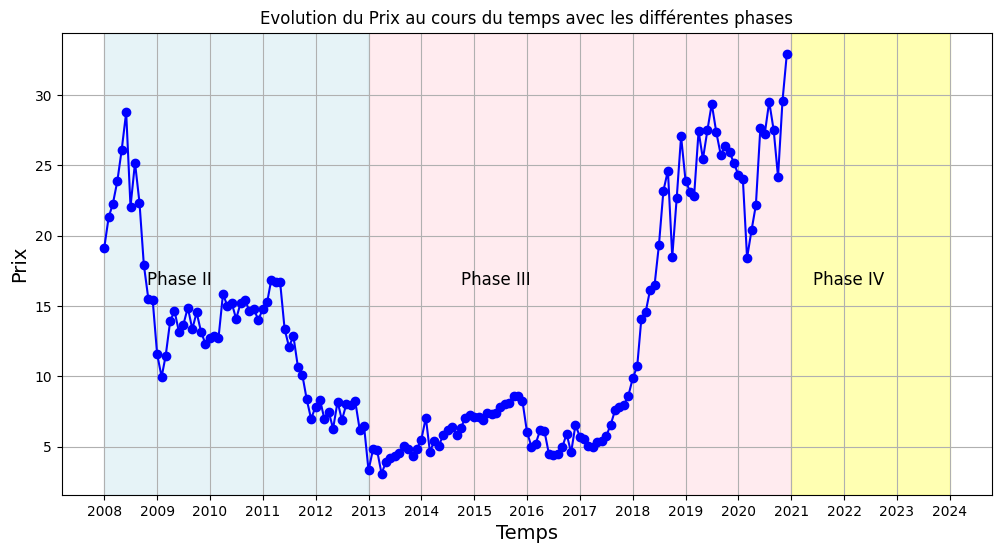

In [183]:
import matplotlib.dates as mdates
fig,ax=plt.subplots(figsize=(12, 6))
ax.plot(Data['Date'],Data['Price'],marker='o',linestyle='-',color='blue')
ax.axvspan(pd.Timestamp('2008-01-01'), pd.Timestamp('2012-12-31'), color='lightblue', alpha=0.3, label='2008-2012')
ax.axvspan(pd.Timestamp('2013-01-01'), pd.Timestamp('2020-12-31'), color='pink', alpha=0.3, label='2013-2020')
ax.axvspan(pd.Timestamp('2021-01-01'), pd.Timestamp('2023-12-31'), color='yellow', alpha=0.3, label='2021-2023')
# Personnaliser les ticks pour afficher chaque année
ax.xaxis.set_major_locator(mdates.YearLocator(1))  # Affiche chaque année
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))


ax.text(pd.Timestamp('2009-06-01'), Data['Price'].max()*0.5, 'Phase II', fontsize=12, color='black', ha='center')
ax.text(pd.Timestamp('2015-06-01'), Data['Price'].max()*0.5, 'Phase III', fontsize=12, color='black', ha='center')
ax.text(pd.Timestamp('2021-06-01'), Data['Price'].max()*0.5, 'Phase IV', fontsize=12, color='black', ha='left')

plt.title('Evolution du Prix au cours du temps avec les différentes phases')
plt.xlabel('Temps',fontsize=14)
plt.ylabel('Prix', fontsize=14)
plt.grid(True)
plt.show()

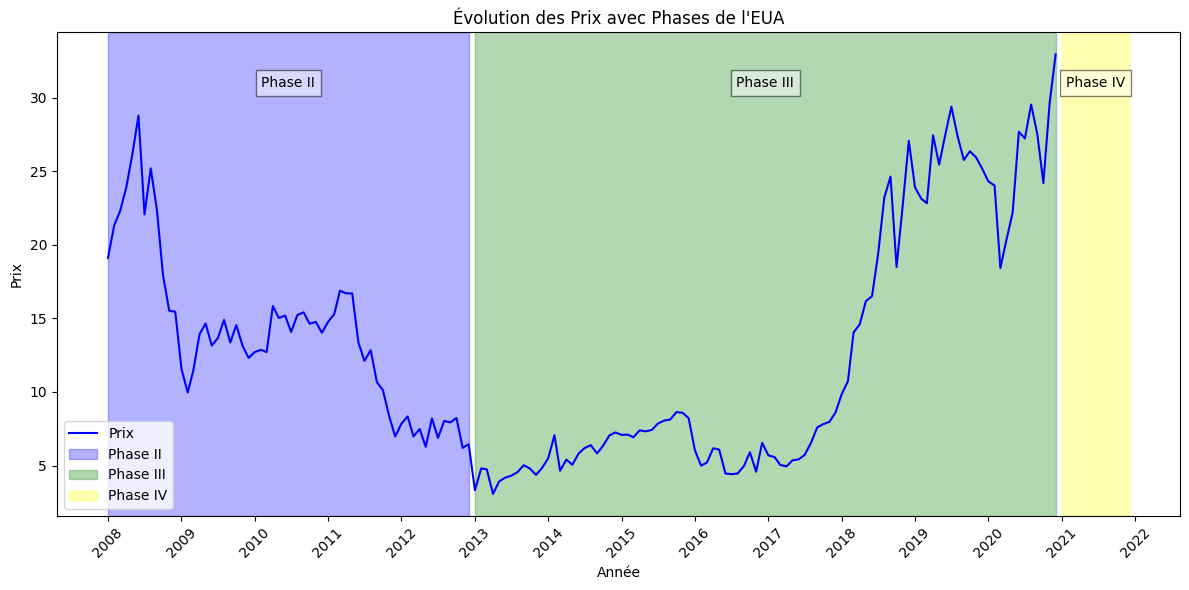

In [184]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Exemple de phases de l'EUA (à adapter selon vos besoins)
phases = {
    'Phase II': ['2008-01-01', '2012-12-01'],
    'Phase III': ['2013-01-01', '2020-12-01'],
    'Phase IV': ['2021-01-01', '2021-12-01'],
}


# Créer le graphique
fig, ax = plt.subplots(figsize=(12, 6))

# Tracer les données
ax.plot(Data['Date'], Data['Price'], label='Prix', color='blue')

# Colorier les phases
colors = ['blue', 'green', 'yellow']
for (phase, period), color in zip(phases.items(), colors):
    start, end = pd.to_datetime(period)
    ax.axvspan(start, end, color=color, alpha=0.3, label=phase)
    # Ajouter une annotation pour la phase
    ax.text((start + (end - start) / 2), ax.get_ylim()[1] * 0.9, phase,
            horizontalalignment='center', verticalalignment='center',
            fontsize=10, color='black', bbox=dict(facecolor='white', alpha=0.5))

# Formater l'axe des x pour afficher uniquement les années ou le mois de janvier
ax.xaxis.set_major_locator(mdates.YearLocator(month=1, day=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Ajouter des labels et une légende
ax.set_xlabel('Année')
ax.set_ylabel('Prix')
ax.set_title('Évolution des Prix avec Phases de l\'EUA')
ax.legend()

# Afficher le graphique
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## EXPLORATION DES DONNEES : ( je n'ai fait que de la corrélation )

Autres pistes : histogramme

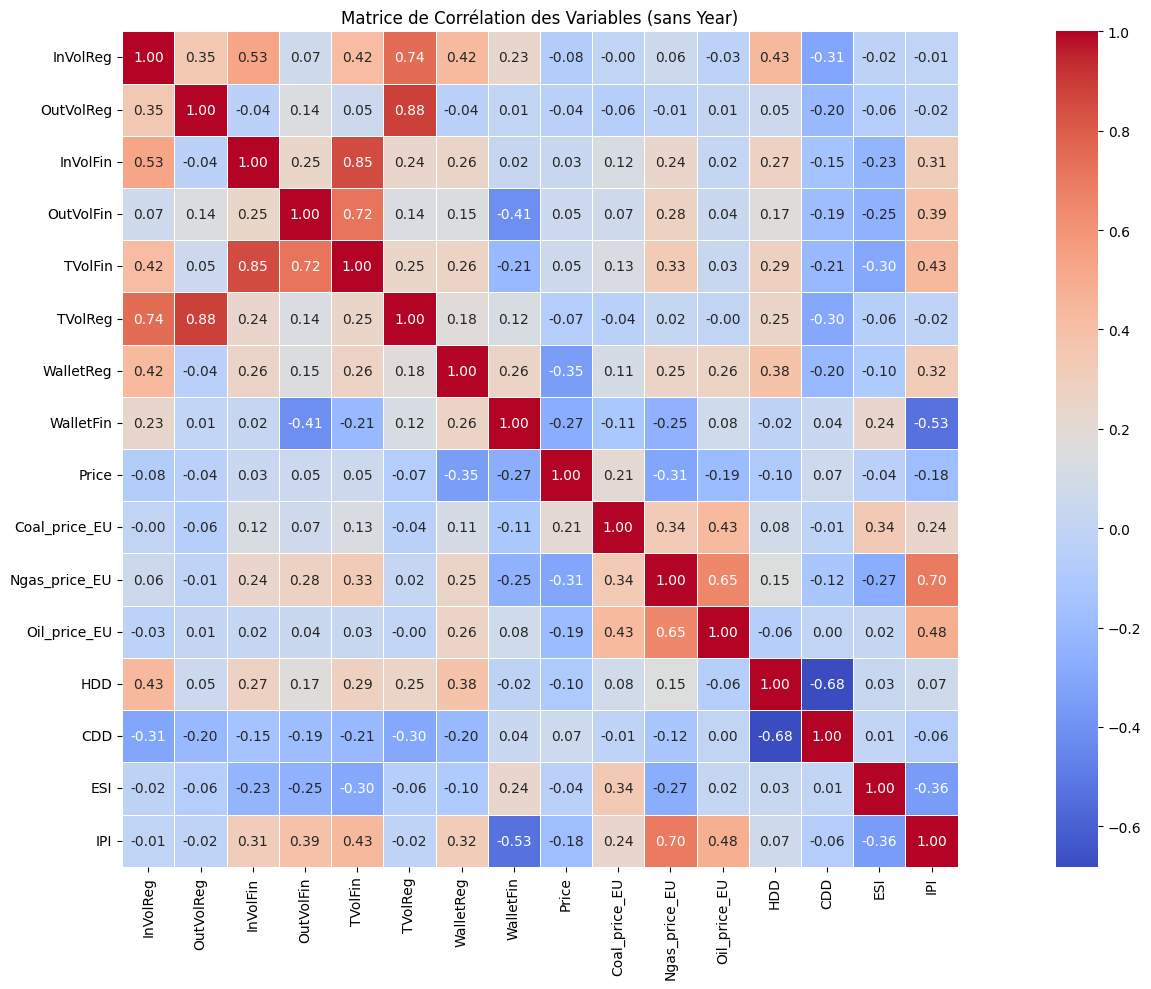

In [185]:
import seaborn as sns
# 1. Filtrer uniquement les colonnes numériques sauf 'Year'
df_corr = Data.drop(columns=['Year','Date','Time'], errors='ignore')

# 2. Calculer la matrice de corrélation
corr_matrix = df_corr.corr()

# 3. Visualiser la matrice de corrélation avec un heatmap
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, linewidths=0.5)

# Personnalisation du graphique
plt.title('Matrice de Corrélation des Variables (sans Year)')
plt.tight_layout()

# Afficher le graphique
plt.show()


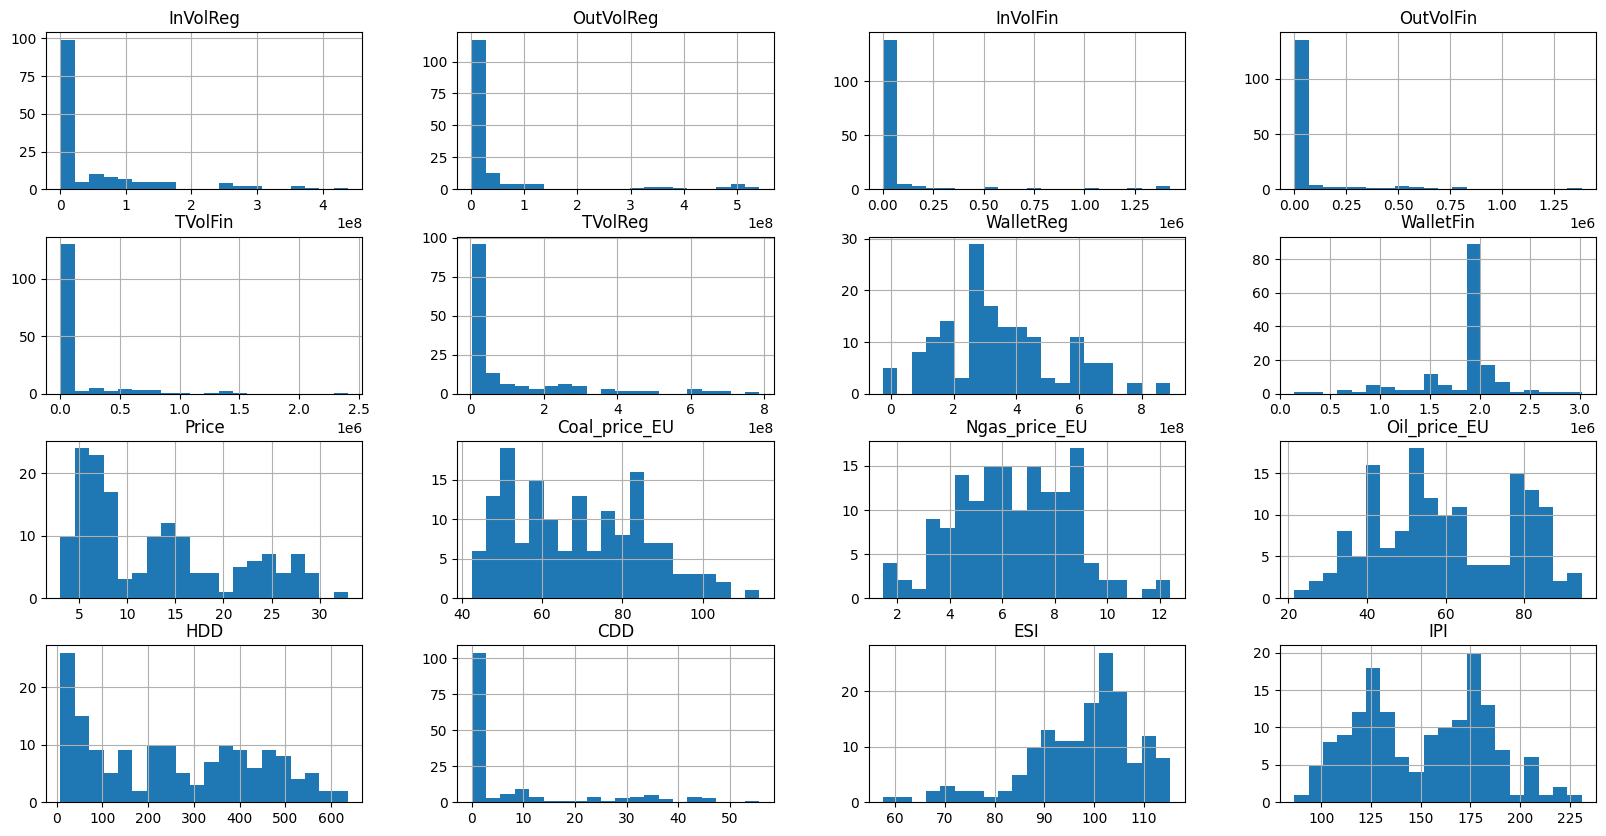

In [186]:
# Tracer les histogrammes
df_corr.hist(bins=20, figsize=(20, 10))
plt.show()

In [187]:
print(Data.columns)

Index(['Date', 'InVolReg', 'OutVolReg', 'InVolFin', 'OutVolFin', 'TVolFin',
       'TVolReg', 'WalletReg', 'WalletFin', 'Time', 'Price', 'Coal_price_EU',
       'Ngas_price_EU', 'Oil_price_EU', 'HDD', 'CDD', 'ESI', 'IPI'],
      dtype='object')


## Test de stationnarité au global

In [188]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Fonction pour tester la stationnarité avec le test ADF
def test_stationarity(series, significance_level=0.05):
    result = adfuller(series.dropna())
    p_value = result[1]
    return p_value < significance_level  # True si stationnaire, False sinon


# Exclure la colonne 'Year'
variables = Data.drop(columns=['Date','Time'],axis=1)

# Dictionnaire pour stocker les résultats
stationarity_results = {}

# Tester chaque variable pour la stationnarité
for col in variables.columns:
    series = variables[col]
    result = adfuller(series.dropna())
    p_value = result[1]
    
    if p_value < 0.05:
        status = 'Stationnaire'
    else:
        status = 'Non-stationnaire'
    
    stationarity_results[col] = p_value

# Résumé des résultats
print("\n--- Résultats de la stationnarité ---")
for variable, p_value in stationarity_results.items():
    status = 'Stationnaire' if p_value < 0.05 else 'Non-stationnaire'
    print(f"{variable}: {status} (p-value = {p_value:.4f})")



--- Résultats de la stationnarité ---
InVolReg: Stationnaire (p-value = 0.0133)
OutVolReg: Non-stationnaire (p-value = 0.0968)
InVolFin: Non-stationnaire (p-value = 0.1446)
OutVolFin: Stationnaire (p-value = 0.0328)
TVolFin: Stationnaire (p-value = 0.0018)
TVolReg: Non-stationnaire (p-value = 0.1423)
WalletReg: Non-stationnaire (p-value = 0.1970)
WalletFin: Stationnaire (p-value = 0.0185)
Price: Non-stationnaire (p-value = 0.8903)
Coal_price_EU: Stationnaire (p-value = 0.0292)
Ngas_price_EU: Stationnaire (p-value = 0.0433)
Oil_price_EU: Non-stationnaire (p-value = 0.3272)
HDD: Non-stationnaire (p-value = 0.4526)
CDD: Stationnaire (p-value = 0.0312)
ESI: Non-stationnaire (p-value = 0.1035)
IPI: Non-stationnaire (p-value = 0.2837)


## DIVISION DES DONNEES PAR PHASE + TEST DE STATIONNARITE PAR PHASE

### Divisions des données par phase

In [189]:
Data.dtypes

Date             datetime64[ns]
InVolReg                float64
OutVolReg               float64
InVolFin                float64
OutVolFin               float64
TVolFin                 float64
TVolReg                 float64
WalletReg               float64
WalletFin               float64
Time                     object
Price                   float64
Coal_price_EU           float64
Ngas_price_EU           float64
Oil_price_EU            float64
HDD                     float64
CDD                     float64
ESI                     float64
IPI                     float64
dtype: object

In [190]:
# Créer des DataFrames séparés pour chaque phase
phase_data = {}
for phase, (start, end) in phases.items():
    start_date = pd.to_datetime(start)
    end_date = pd.to_datetime(end)
    phase_data[phase] = Data[(Data['Date'] >= start_date) & (Data['Date'] <= end_date)]

# Afficher les premières lignes de chaque DataFrame de phase
for phase, df in phase_data.items():
    # Utiliser exec pour créer dynamiquement des variables
    exec(f"{phase.replace(' ', '_')}_df = df")

### Test de stationnarité par phases

In [191]:
from statsmodels.tsa.stattools import adfuller

# Fonction pour tester la stationnarité avec le test ADF
def test_stationarity(series, significance_level=0.05):
    result = adfuller(series.dropna())
    p_value = result[1]
    return p_value < significance_level  # True si stationnaire, False sinon

# Dictionnaire pour stocker les résultats de stationnarité pour chaque phase
all_stationarity_results = {}

# Parcourir chaque DataFrame dans phase_data
for phase, df in phase_data.items():
    print(f"\n--- Test de stationnarité pour {phase} ---")

    # Exclure les colonnes non pertinentes
    variables = df.drop(columns=['Year', 'Date', 'Time'], axis=1, errors='ignore')

    # Dictionnaire pour stocker les résultats de cette phase
    stationarity_results = {}

    # Tester chaque variable pour la stationnarité
    for col in variables.columns:
        series = variables[col]
        result = adfuller(series.dropna())
        p_value = result[1]

        if p_value < 0.05:
            status = 'Stationnaire'
        else:
            status = 'Non-stationnaire'

        stationarity_results[col] = p_value
        print(f"{col}: {status} (p-value = {p_value:.4f})")

    # Stocker les résultats pour cette phase
    all_stationarity_results[phase] = stationarity_results

# Résumé des résultats pour toutes les phases
print("\n--- Résumé des résultats de la stationnarité ---")
for phase, results in all_stationarity_results.items():
    print(f"\nPhase {phase}:")
    for variable, p_value in results.items():
        status = 'Stationnaire' if p_value < 0.05 else 'Non-stationnaire'
        print(f"{variable}: {status} (p-value = {p_value:.4f})")



--- Test de stationnarité pour Phase II ---
InVolReg: Non-stationnaire (p-value = 0.6025)
OutVolReg: Non-stationnaire (p-value = 0.4899)
InVolFin: Non-stationnaire (p-value = 0.7097)
OutVolFin: Non-stationnaire (p-value = 0.3461)
TVolFin: Non-stationnaire (p-value = 0.5655)
TVolReg: Non-stationnaire (p-value = 0.7536)
WalletReg: Non-stationnaire (p-value = 0.7435)
WalletFin: Stationnaire (p-value = 0.0332)
Price: Non-stationnaire (p-value = 0.6838)
Coal_price_EU: Non-stationnaire (p-value = 0.2213)
Ngas_price_EU: Non-stationnaire (p-value = 0.1522)
Oil_price_EU: Non-stationnaire (p-value = 0.7796)
HDD: Non-stationnaire (p-value = 0.2537)
CDD: Non-stationnaire (p-value = 0.7052)
ESI: Stationnaire (p-value = 0.0000)
IPI: Non-stationnaire (p-value = 0.2933)

--- Test de stationnarité pour Phase III ---
InVolReg: Non-stationnaire (p-value = 0.1099)
OutVolReg: Stationnaire (p-value = 0.0188)
InVolFin: Stationnaire (p-value = 0.0000)
OutVolFin: Stationnaire (p-value = 0.0000)
TVolFin: Stati

c:\Users\zoero\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\linear_model.py:955: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
c:\Users\zoero\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\linear_model.py:955: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
c:\Users\zoero\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\linear_model.py:955: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
c:\Users\zoero\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\linear_model.py:955: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


ValueError: zero-size array to reduction operation maximum which has no identity

## Transformation et regression phase par phase

### Phase II

#### Transformation logarithmique

In [192]:
import numpy as np
# Colonnes à exclure de la transformation
colonnes_a_exclure = ['Date', 'Time']

# Calculer le décalage pour chaque colonne à transformer
shift_per_col = Phase_II_df.drop(columns=colonnes_a_exclure).min().abs() + 1


# Appliquer le shift et la transformation log1p aux colonnes restantes
Phase_II_log = Phase_II_df.copy()
for col in Phase_II_log.columns:
    if col not in colonnes_a_exclure:
        Phase_II_log[col] = np.log1p(Phase_II_log[col] + shift_per_col[col])


In [193]:
Phase_II_log.isna().sum()

Date             0
InVolReg         0
OutVolReg        0
InVolFin         0
OutVolFin        0
TVolFin          0
TVolReg          0
WalletReg        0
WalletFin        0
Time             0
Price            0
Coal_price_EU    0
Ngas_price_EU    0
Oil_price_EU     0
HDD              0
CDD              0
ESI              0
IPI              0
dtype: int64

In [194]:
# Colonnes à exclure du test de stationnarité
colonnes_a_exclure = ['Date','Time']

# Fonction pour tester la stationnarité
def test_stationarity(series):
    result = adfuller(series.dropna())
    p_value = result[1]
    return p_value

# Appliquer le test de stationnarité aux colonnes non exclues
stationarity_results = {}
for col in Phase_II_log.columns:
    if col not in colonnes_a_exclure:
        p_value = test_stationarity(Phase_II_log[col])
        stationarity_results[col] = p_value
        print(f"Colonne {col}: p-value = {p_value:.4f}")

# Interprétation des résultats
alpha = 0.05
for col, p_value in stationarity_results.items():
    if p_value < alpha:
        print(f"La série {col} est stationnaire (p-value < {alpha}).")
    else:
        print(f"La série {col} n'est pas stationnaire (p-value >= {alpha}).")

Colonne InVolReg: p-value = 0.9652
Colonne OutVolReg: p-value = 0.6966
Colonne InVolFin: p-value = 0.5922
Colonne OutVolFin: p-value = 0.0000
Colonne TVolFin: p-value = 0.0006
Colonne TVolReg: p-value = 0.8917
Colonne WalletReg: p-value = 0.1051
Colonne WalletFin: p-value = 0.0044
Colonne Price: p-value = 0.7740
Colonne Coal_price_EU: p-value = 0.2735
Colonne Ngas_price_EU: p-value = 0.1315
Colonne Oil_price_EU: p-value = 0.7769
Colonne HDD: p-value = 0.4916
Colonne CDD: p-value = 0.8280
Colonne ESI: p-value = 0.0000
Colonne IPI: p-value = 0.3468
La série InVolReg n'est pas stationnaire (p-value >= 0.05).
La série OutVolReg n'est pas stationnaire (p-value >= 0.05).
La série InVolFin n'est pas stationnaire (p-value >= 0.05).
La série OutVolFin est stationnaire (p-value < 0.05).
La série TVolFin est stationnaire (p-value < 0.05).
La série TVolReg n'est pas stationnaire (p-value >= 0.05).
La série WalletReg n'est pas stationnaire (p-value >= 0.05).
La série WalletFin est stationnaire (p-v

#### Differenciation

In [195]:
Phase_II_diff = Phase_II_log.copy()

# Appliquer une différenciation d'ordre 1 puis d'ordre 2 si nécessaire
for col in Phase_II_diff.columns:
    if col not in colonnes_a_exclure:
        p_value = test_stationarity(Phase_II_diff[col])  # Tester la stationnarité
        
        if p_value < 0.05:
            print(f"✅ {col} est déjà stationnaire, pas de différenciation appliquée.")
        else:
            #Appliquer transformation log
            
            # Appliquer une différenciation d'ordre 1
            Phase_II_diff[col] = Phase_II_diff[col].diff()
            p_value_after_diff1 = test_stationarity(Phase_II_diff[col])
            
            if p_value_after_diff1 < 0.05:
                print(f"📉 Différenciation d'ordre 1 appliquée à {col} (car p-value={p_value:.4f})")
            else:
                print()
                # Appliquer une différenciation d'ordre 2 si encore non stationnaire
                Phase_II_diff[col] = Phase_II_diff[col].diff()
                print(f"📉📉 Différenciation d'ordre 2 appliquée à {col} (car p-value après diff1={p_value_after_diff1:.4f})")





📉 Différenciation d'ordre 1 appliquée à InVolReg (car p-value=0.9652)
📉 Différenciation d'ordre 1 appliquée à OutVolReg (car p-value=0.6966)
📉 Différenciation d'ordre 1 appliquée à InVolFin (car p-value=0.5922)
✅ OutVolFin est déjà stationnaire, pas de différenciation appliquée.
✅ TVolFin est déjà stationnaire, pas de différenciation appliquée.
📉 Différenciation d'ordre 1 appliquée à TVolReg (car p-value=0.8917)

📉📉 Différenciation d'ordre 2 appliquée à WalletReg (car p-value après diff1=0.4947)
✅ WalletFin est déjà stationnaire, pas de différenciation appliquée.
📉 Différenciation d'ordre 1 appliquée à Price (car p-value=0.7740)
📉 Différenciation d'ordre 1 appliquée à Coal_price_EU (car p-value=0.2735)
📉 Différenciation d'ordre 1 appliquée à Ngas_price_EU (car p-value=0.1315)
📉 Différenciation d'ordre 1 appliquée à Oil_price_EU (car p-value=0.7769)
📉 Différenciation d'ordre 1 appliquée à HDD (car p-value=0.4916)
📉 Différenciation d'ordre 1 appliquée à CDD (car p-value=0.8280)
✅ ESI est

In [196]:
# Colonnes à exclure du test de stationnarité


# Fonction pour tester la stationnarité
def test_stationarity(series):
    result = adfuller(series.dropna())
    p_value = result[1]
    return p_value

# Appliquer le test de stationnarité aux colonnes non exclues
stationarity_results = {}
for col in Phase_II_diff.columns:
    if col not in colonnes_a_exclure:
        p_value = test_stationarity(Phase_II_diff[col])
        stationarity_results[col] = p_value

# Interprétation des résultats
alpha = 0.05
for col, p_value in stationarity_results.items():
    if p_value < alpha:
        print(f"La série {col} est stationnaire (p-value < {alpha}).")
    else:
        print(f"La série {col} n'est pas stationnaire (p-value >= {alpha}).")

La série InVolReg est stationnaire (p-value < 0.05).
La série OutVolReg est stationnaire (p-value < 0.05).
La série InVolFin est stationnaire (p-value < 0.05).
La série OutVolFin est stationnaire (p-value < 0.05).
La série TVolFin est stationnaire (p-value < 0.05).
La série TVolReg est stationnaire (p-value < 0.05).
La série WalletReg est stationnaire (p-value < 0.05).
La série WalletFin est stationnaire (p-value < 0.05).
La série Price est stationnaire (p-value < 0.05).
La série Coal_price_EU est stationnaire (p-value < 0.05).
La série Ngas_price_EU est stationnaire (p-value < 0.05).
La série Oil_price_EU est stationnaire (p-value < 0.05).
La série HDD est stationnaire (p-value < 0.05).
La série CDD est stationnaire (p-value < 0.05).
La série ESI est stationnaire (p-value < 0.05).
La série IPI est stationnaire (p-value < 0.05).


In [197]:
print(Phase_II_diff.isnull().sum())

Date             0
InVolReg         1
OutVolReg        1
InVolFin         1
OutVolFin        0
TVolFin          0
TVolReg          1
WalletReg        2
WalletFin        0
Time             0
Price            1
Coal_price_EU    1
Ngas_price_EU    1
Oil_price_EU     1
HDD              1
CDD              1
ESI              0
IPI              1
dtype: int64


#### Enregistrement en csv de la série stationnarisée

In [198]:
Phase_II_diff.to_csv("../data_stationnaires/Cluster0_Phase_II.csv")

#### Ajout de lags

In [199]:
import pandas as pd

# Colonnes à exclure de l'ajout des lags
colonnes_a_exclure = ['Time', 'Date', 'Year']

# Durée du lag (décalage de 2 périodes par exemple)
lag_length = 2

# Copie du DataFrame initial
Phase_II_with_lags = Phase_II_diff.copy()

# Liste pour stocker les colonnes avec les lags
lagged_data = []

# Ajouter des lags sur les colonnes sélectionnées
for col in Phase_II_diff.columns:
    if col not in colonnes_a_exclure:
        # Ajouter des lags pour la colonne, avec shift
        for lag in range(1, lag_length + 1):  # Ajouter plusieurs lags
            lagged_col = Phase_II_diff[col].shift(lag)
            lagged_col.name = f"{col}_lag{lag}"  # Nommer la colonne laggée
            lagged_data.append(lagged_col)

# Concaténer les colonnes originales avec les nouvelles colonnes avec lags
Phase_II_with_lags = pd.concat([Phase_II_with_lags] + lagged_data, axis=1)

# Afficher le DataFrame avec les lags
len(Phase_II_with_lags)

60

#### Regression linéaire I

In [200]:
import statsmodels.api as sm
Phase_II_reg=Phase_II_with_lags.dropna()
# Définir la variable cible (Y) et les variables explicatives (X)
Y = Phase_II_reg['Price']  # La variable cible (Price)
X = Phase_II_reg.drop(["Time","Date"],axis=1)

# Ajouter une constante pour l'intercept
X = sm.add_constant(X)

# Ajuster le modèle de régression
model = sm.OLS(Y, X).fit()

# Résumé du modèle
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.331e+25
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           9.55e-88
Time:                        16:47:11   Log-Likelihood:                 1738.2
No. Observations:                  56   AIC:                            -3378.
Df Residuals:                       7   BIC:                            -3279.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.776e-15   7.09

#### Stepwise en fonction de la p-value

In [201]:
def stepwise_descendant(X, Y, significance_level=0.05):
    """
    Algorithme de sélection pas à pas descendante pour la régression linéaire.

    :param X: DataFrame des variables indépendantes
    :param y: Série des valeurs de la variable dépendante
    :param significance_level: Niveau de signification pour retirer les variables
    :return: Modèle final avec les variables sélectionnées
    """
    # Ajouter une constante au modèle
    X = sm.add_constant(X)

    # Initialiser le modèle avec toutes les variables
    model = sm.OLS(Y, X).fit()

    while True:
        # Trouver la variable avec la plus grande p-value supérieure au niveau de signification
        max_p_value = model.pvalues.max()
        if max_p_value < significance_level:
            break

        # Retirer la variable avec la plus grande p-value
        worst_feature = model.pvalues.idxmax()
        if worst_feature == 'const':
            break

        X = X.drop(columns=[worst_feature])
        model = sm.OLS(Y, X).fit()

    return model

final_model = stepwise_descendant(X, Y)
print(final_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.372e+28
Date:                Thu, 27 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:47:12   Log-Likelihood:                 1786.8
No. Observations:                  56   AIC:                            -3568.
Df Residuals:                      53   BIC:                            -3561.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -9.298e-16   8.66e-16     -1.074   

In [202]:
final_model.pvalues

const           0.287664
Price           0.000000
TVolFin_lag2    0.004506
dtype: float64

#### Stepwise en fonction de la p-value (2)

In [203]:
import statsmodels.api as sm
import pandas as pd

# Fonction de backward elimination
def stepwise_backward_selection(X, Y, threshold_in=0.05, threshold_out=0.10):
    """
    Effectuer une sélection backward en commençant par un modèle complet.
    threshold_in : p-value pour ajouter une variable (pas utilisé ici car on commence avec tout)
    threshold_out : p-value pour retirer une variable
    """
    # Commencer avec toutes les variables
    # Liste de toutes les variables
    included = list(X.columns)
    best_model = sm.OLS(Y,X[included]).fit()
    
    # Boucle pour supprimer les variables non significatives
    while True:
        # Calculer les p-values du modèle actuel
        p_values = best_model.pvalues[1:]  # Ignorer la constante (intercept)
        
        # Trouver la plus grande p-value parmi les variables restantes
        max_p_value = p_values.max()
        
        # Si la plus grande p-value est plus grande que le seuil de retrait
        if max_p_value > threshold_out:
            # Identifier et supprimer la variable avec la p-value la plus élevée
            excluded_variable = p_values.idxmax()
            included.remove(excluded_variable)
            print(f"Retirer la variable {excluded_variable} avec p-value = {max_p_value}")
            best_model = sm.OLS(Y,X[included]).fit()
        else:
            break
    
    return best_model

# Appliquer le stepwise backward selection
best_model = stepwise_backward_selection(X, Y, threshold_out=0.10)

# Résumé du modèle final
print(best_model.summary())


Retirer la variable CDD avec p-value = 0.9998225418425657
Retirer la variable Price_lag1 avec p-value = 0.9998127992314515
Retirer la variable TVolReg_lag2 avec p-value = 0.9994275850856192
Retirer la variable OutVolFin avec p-value = 1.0
Retirer la variable OutVolReg_lag2 avec p-value = 0.9982859882540795
Retirer la variable OutVolReg_lag1 avec p-value = 0.9959005243964963
Retirer la variable Coal_price_EU_lag1 avec p-value = 0.9998725981998479
Retirer la variable OutVolFin_lag2 avec p-value = 0.9992494050134035
Retirer la variable WalletReg_lag1 avec p-value = 1.0
Retirer la variable OutVolReg avec p-value = 0.9975717321363262
Retirer la variable WalletReg_lag2 avec p-value = 1.0
Retirer la variable Price_lag2 avec p-value = 0.9994146589290152
Retirer la variable TVolFin_lag1 avec p-value = 0.9968741820826057
Retirer la variable Coal_price_EU_lag2 avec p-value = 1.0
Retirer la variable WalletFin avec p-value = 0.9975473953637677
Retirer la variable TVolFin avec p-value = 0.9972040592

#### Stepwise en fonction de l'AIC

In [204]:
# Fonction de backward elimination basée sur AIC
def stepwise_aic(X, Y, threshold_in=0.05, threshold_out=0.10):
    """
    Effectuer une sélection backward basée sur l'AIC.
    threshold_in : p-value pour ajouter une variable (pas utilisé ici car on commence avec tout)
    threshold_out : p-value pour retirer une variable
    """
    # Commencer avec toutes les variables
    included = list(X.columns)  # Liste de toutes les variables
    best_model = sm.OLS(Y, sm.add_constant(X[included])).fit()
    current_aic = best_model.aic
    
    # Boucle pour supprimer les variables non significatives en fonction de l'AIC
    while True:
        # Calculer les AIC pour tous les modèles possibles en retirant une variable à la fois
        aic_values = []
        
        for col in included:
            temp_included = included.copy()
            temp_included.remove(col)  # Créer une version du modèle sans cette variable
            
            # Ajuster le modèle sans cette variable
            model = sm.OLS(Y, sm.add_constant(X[temp_included])).fit()
            aic_values.append((col, model.aic))
        
        # Trouver la variable qui minimise l'AIC
        best_aic_var, best_aic = min(aic_values, key=lambda x: x[1])

        # Si l'AIC diminue, on retire la variable avec le plus mauvais AIC
        if current_aic > best_aic:
            included.remove(best_aic_var)
            print(f"Retirer la variable {best_aic_var} avec AIC = {best_aic}")
            best_model = sm.OLS(Y, sm.add_constant(X[included])).fit()
            current_aic = best_model.aic
        else:
            break  # Si l'AIC n'est plus amélioré, on arrête
    
    return best_model
# Appliquer le stepwise basé sur AIC
best_model = stepwise_aic(X, Y)

# Résumé du modèle final
print(best_model.summary())

Retirer la variable Coal_price_EU_lag2 avec AIC = -3538.2436520229717
Retirer la variable Coal_price_EU avec AIC = -3543.2693384273066
Retirer la variable Ngas_price_EU_lag2 avec AIC = -3557.1187358041543
Retirer la variable TVolReg avec AIC = -3563.3089103542648
Retirer la variable Oil_price_EU avec AIC = -3608.190241108117
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.291e+27
Date:                Thu, 27 Feb 2025   Prob (F-statistic):          2.67e-161
Time:                        16:47:16   Log-Likelihood:                 1848.1
No. Observations:                  56   AIC:                            -3608.
Df Residuals:                      12   BIC:                            -3519.
Df Model:                          43    

### Phase III

#### Transformation logarithmique

In [205]:
Phase_III_df
Phase_III_df.isnull().sum()

Date             0
InVolReg         0
OutVolReg        0
InVolFin         0
OutVolFin        0
TVolFin          0
TVolReg          0
WalletReg        0
WalletFin        0
Time             0
Price            0
Coal_price_EU    0
Ngas_price_EU    0
Oil_price_EU     0
HDD              0
CDD              0
ESI              0
IPI              0
dtype: int64

In [206]:
# Colonnes à exclure de la transformation
colonnes_a_exclure = ['Date', 'Time']

# Calculer le décalage pour chaque colonne à transformer
shift_per_col = Phase_III_df.drop(columns=colonnes_a_exclure).min().abs() + 1

# Appliquer le shift et la transformation log1p aux colonnes restantes
Phase_III_log = Phase_III_df.copy()
for col in Phase_III_log.columns:
    if col not in colonnes_a_exclure:
        Phase_III_log[col] = np.log1p(Phase_III_log[col] + shift_per_col[col])

print(Phase_III_log)

          Date   InVolReg  OutVolReg  InVolFin  OutVolFin   TVolFin  \
60  2013-01-01  17.242583  16.666437  0.693147   0.693147  0.693147   
61  2013-02-01  16.661673  16.754458  0.693147   0.693147  0.693147   
62  2013-03-01  17.921786  18.123217  5.852202   0.693147  5.852202   
63  2013-04-01  18.963417  20.059812  0.693147   9.781546  9.781546   
64  2013-05-01  15.917698  17.828442  0.693147   0.693147  0.693147   
..         ...        ...        ...       ...        ...       ...   
151 2020-08-01  17.017185  15.497416  0.693147   0.693147  0.693147   
152 2020-09-01  16.173687  15.691737  0.693147   0.693147  0.693147   
153 2020-10-01  16.549618  15.660141  0.693147   0.693147  0.693147   
154 2020-11-01  16.131365  17.309108  0.693147   0.693147  0.693147   
155 2020-12-01  18.395614  17.347510  0.693147   0.693147  0.693147   

       TVolReg  WalletReg  WalletFin     Time     Price  Coal_price_EU  \
60   17.727194  20.382989  15.215374  01/2013  2.125848       4.738002   

In [207]:
# Colonnes à exclure du test de stationnarité
colonnes_a_exclure = ['Date','Time']

# Fonction pour tester la stationnarité
def test_stationarity(series):
    result = adfuller(series.dropna())
    p_value = result[1]
    return p_value

# Appliquer le test de stationnarité aux colonnes non exclues
stationarity_results = {}
for col in Phase_III_log.columns:
    if col not in colonnes_a_exclure:
        p_value = test_stationarity(Phase_III_log[col])
        stationarity_results[col] = p_value
        print(f"Colonne {col}: p-value = {p_value:.4f}")

# Interprétation des résultats
alpha = 0.05
for col, p_value in stationarity_results.items():
    if p_value < alpha:
        print(f"La série {col} est stationnaire (p-value < {alpha}).")
    else:
        print(f"La série {col} n'est pas stationnaire (p-value >= {alpha}).")

Colonne InVolReg: p-value = 0.1041
Colonne OutVolReg: p-value = 0.3522
Colonne InVolFin: p-value = 0.0000
Colonne OutVolFin: p-value = 0.0000
Colonne TVolFin: p-value = 0.0000
Colonne TVolReg: p-value = 0.7559
Colonne WalletReg: p-value = 0.0033
Colonne WalletFin: p-value = 0.0000
Colonne Price: p-value = 0.9178
Colonne Coal_price_EU: p-value = 0.2182
Colonne Ngas_price_EU: p-value = 0.1920
Colonne Oil_price_EU: p-value = 0.2493
Colonne HDD: p-value = 0.2048
Colonne CDD: p-value = 0.4243
Colonne ESI: p-value = 0.0581
Colonne IPI: p-value = 0.7014
La série InVolReg n'est pas stationnaire (p-value >= 0.05).
La série OutVolReg n'est pas stationnaire (p-value >= 0.05).
La série InVolFin est stationnaire (p-value < 0.05).
La série OutVolFin est stationnaire (p-value < 0.05).
La série TVolFin est stationnaire (p-value < 0.05).
La série TVolReg n'est pas stationnaire (p-value >= 0.05).
La série WalletReg est stationnaire (p-value < 0.05).
La série WalletFin est stationnaire (p-value < 0.05).


c:\Users\zoero\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\linear_model.py:955: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
c:\Users\zoero\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\linear_model.py:955: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
c:\Users\zoero\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\linear_model.py:955: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
c:\Users\zoero\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\linear_model.py:955: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


#### Differenciation

In [208]:
Phase_III_diff = Phase_III_log.copy()

# Appliquer une différenciation d'ordre 1 uniquement aux variables non stationnaires
for col in Phase_III_diff.columns:
    if col not in colonnes_a_exclure:
        p_value = test_stationarity(Phase_III_diff[col])  # Tester la stationnarité
        
        if p_value < 0.05:
            print(f"✅ {col} est déjà stationnaire, pas de différenciation appliquée.")
        else:
            Phase_III_diff[col] = Phase_III_diff[col].diff()
            print(f"📉 Différenciation appliquée à {col} (car p-value={p_value:.4f})")

# Afficher les premières lignes des données après traitement
print(Phase_III_diff.head())

📉 Différenciation appliquée à InVolReg (car p-value=0.1041)
📉 Différenciation appliquée à OutVolReg (car p-value=0.3522)
✅ InVolFin est déjà stationnaire, pas de différenciation appliquée.
✅ OutVolFin est déjà stationnaire, pas de différenciation appliquée.
✅ TVolFin est déjà stationnaire, pas de différenciation appliquée.
📉 Différenciation appliquée à TVolReg (car p-value=0.7559)
✅ WalletReg est déjà stationnaire, pas de différenciation appliquée.
✅ WalletFin est déjà stationnaire, pas de différenciation appliquée.
📉 Différenciation appliquée à Price (car p-value=0.9178)
📉 Différenciation appliquée à Coal_price_EU (car p-value=0.2182)


c:\Users\zoero\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\linear_model.py:955: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
c:\Users\zoero\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\linear_model.py:955: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
c:\Users\zoero\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\linear_model.py:955: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
c:\Users\zoero\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\linear_model.py:955: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


📉 Différenciation appliquée à Ngas_price_EU (car p-value=0.1920)
📉 Différenciation appliquée à Oil_price_EU (car p-value=0.2493)
📉 Différenciation appliquée à HDD (car p-value=0.2048)
📉 Différenciation appliquée à CDD (car p-value=0.4243)
📉 Différenciation appliquée à ESI (car p-value=0.0581)
📉 Différenciation appliquée à IPI (car p-value=0.7014)
         Date  InVolReg  OutVolReg  InVolFin  OutVolFin   TVolFin   TVolReg  \
60 2013-01-01       NaN        NaN  0.693147   0.693147  0.693147       NaN   
61 2013-02-01 -0.580910   0.088021  0.693147   0.693147  0.693147 -0.273825   
62 2013-03-01  1.260113   1.368759  5.852202   0.693147  5.852202  1.281268   
63 2013-04-01  1.041631   1.936595  0.693147   9.781546  9.781546  1.616163   
64 2013-05-01 -3.045719  -2.231370  0.693147   0.693147  0.693147 -2.354986   

    WalletReg  WalletFin     Time     Price  Coal_price_EU  Ngas_price_EU  \
60  20.382989  15.215374  01/2013       NaN            NaN            NaN   
61  20.380143  15.2153

In [209]:
Phase_III_diff = Phase_III_log.copy()
for col in Phase_III_diff.columns:
    if col not in colonnes_a_exclure:
        Phase_III_diff[col] = Phase_III_diff[col].diff()

print(Phase_III_diff)

          Date  InVolReg  OutVolReg  InVolFin  OutVolFin   TVolFin   TVolReg  \
60  2013-01-01       NaN        NaN       NaN        NaN       NaN       NaN   
61  2013-02-01 -0.580910   0.088021  0.000000   0.000000  0.000000 -0.273825   
62  2013-03-01  1.260113   1.368759  5.159055   0.000000  5.159055  1.281268   
63  2013-04-01  1.041631   1.936595 -5.159055   9.088399  3.929343  1.616163   
64  2013-05-01 -3.045719  -2.231370  0.000000  -9.088399 -9.088399 -2.354986   
..         ...       ...        ...       ...        ...       ...       ...   
151 2020-08-01  0.807384  -0.364275  0.000000   0.000000  0.000000  0.435914   
152 2020-09-01 -0.843497   0.194321  0.000000   0.000000  0.000000 -0.516707   
153 2020-10-01  0.375931  -0.031596  0.000000   0.000000  0.000000  0.217778   
154 2020-11-01 -0.418254   1.648967  0.000000   0.000000  0.000000  0.643253   
155 2020-12-01  2.264250   0.038401  0.000000   0.000000  0.000000  1.089805   

     WalletReg  WalletFin     Time     

#### Test de stationnarité 

In [210]:
# Colonnes à exclure du test de stationnarité
colonnes_a_exclure = ['Date', 'Year','Time']

# Fonction pour tester la stationnarité
def test_stationarity(series):
    result = adfuller(series.dropna())
    p_value = result[1]
    return p_value

# Appliquer le test de stationnarité aux colonnes non exclues
stationarity_results = {}
for col in Phase_III_diff.columns:
    if col not in colonnes_a_exclure:
        p_value = test_stationarity(Phase_III_diff[col])
        stationarity_results[col] = p_value
        print(f"Colonne {col}: p-value = {p_value:.4f}")

# Interprétation des résultats
alpha = 0.05
for col, p_value in stationarity_results.items():
    if p_value < alpha:
        print(f"La série {col} est stationnaire (p-value < {alpha}).")
    else:
        print(f"La série {col} n'est pas stationnaire (p-value >= {alpha}).")

Colonne InVolReg: p-value = 0.0000
Colonne OutVolReg: p-value = 0.0009


c:\Users\zoero\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\linear_model.py:955: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
c:\Users\zoero\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\linear_model.py:955: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
c:\Users\zoero\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\linear_model.py:955: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


Colonne InVolFin: p-value = 0.0000
Colonne OutVolFin: p-value = 0.0000
Colonne TVolFin: p-value = 0.0000
Colonne TVolReg: p-value = 0.0000
Colonne WalletReg: p-value = 0.0000
Colonne WalletFin: p-value = 0.0000
Colonne Price: p-value = 0.0000
Colonne Coal_price_EU: p-value = 0.0000
Colonne Ngas_price_EU: p-value = 0.0000
Colonne Oil_price_EU: p-value = 0.0000
Colonne HDD: p-value = 0.0001
Colonne CDD: p-value = 0.0000
Colonne ESI: p-value = 0.9192
Colonne IPI: p-value = 0.0000
La série InVolReg est stationnaire (p-value < 0.05).
La série OutVolReg est stationnaire (p-value < 0.05).
La série InVolFin est stationnaire (p-value < 0.05).
La série OutVolFin est stationnaire (p-value < 0.05).
La série TVolFin est stationnaire (p-value < 0.05).
La série TVolReg est stationnaire (p-value < 0.05).
La série WalletReg est stationnaire (p-value < 0.05).
La série WalletFin est stationnaire (p-value < 0.05).
La série Price est stationnaire (p-value < 0.05).
La série Coal_price_EU est stationnaire (p

c:\Users\zoero\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\linear_model.py:955: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


In [211]:
Phase_III_diff.to_csv("C:/Users/lolpu/Desktop/M2 IES D3S/Projet_tuteuré/Données mensuelles/Bases_nettoyees/Cluster0_Phase_III.csv")

OSError: Cannot save file into a non-existent directory: 'C:\Users\lolpu\Desktop\M2 IES D3S\Projet_tuteuré\Données mensuelles\Bases_nettoyees'

#### Ajout de lags

In [ ]:
import pandas as pd

# Colonnes à exclure de l'ajout des lags
colonnes_a_exclure = ['Time', 'Date', 'Year']

# Durée du lag (décalage de 2 périodes par exemple)
lag_length = 2

# Copie du DataFrame initial
Phase_III_with_lags = Phase_III_diff.copy()

# Liste pour stocker les colonnes avec les lags
lagged_data = []

# Ajouter des lags sur les colonnes sélectionnées
for col in Phase_III_diff.columns:
    if col not in colonnes_a_exclure:
        # Ajouter des lags pour la colonne, avec shift
        for lag in range(1, lag_length + 1):  # Ajouter plusieurs lags
            lagged_col = Phase_III_diff[col].shift(lag)
            lagged_col.name = f"{col}_lag{lag}"  # Nommer la colonne laggée
            lagged_data.append(lagged_col)

# Concaténer les colonnes originales avec les nouvelles colonnes avec lags
Phase_III_with_lags = pd.concat([Phase_III_with_lags] + lagged_data, axis=1)

# Afficher le DataFrame avec les lags
Phase_III_with_lags

,Date,InVolReg,OutVolReg,InVolFin,OutVolFin,TVolFin,TVolReg,WalletReg,WalletFin,Time,...,Oil_price_EU_lag1,Oil_price_EU_lag2,HDD_lag1,HDD_lag2,CDD_lag1,CDD_lag2,ESI_lag1,ESI_lag2,IPI_lag1,IPI_lag2
60,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/2013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,2013-02-01,-0.078472,-0.384833,0.0,0.000000,0.000000,-0.180283,0.026875,0.0000,02/2013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,2013-03-01,0.747898,2.011866,0.0,9.558459,9.558459,1.312794,-0.059664,-0.0081,03/2013,...,0.020094,NaN,-0.148276,NaN,0.000000,NaN,0.006083,NaN,0.018508,NaN
63,2013-04-01,1.511074,1.932820,0.0,-9.558459,-9.558459,1.785384,-1.138431,0.0000,04/2013,...,-0.027078,0.020094,0.047913,-0.148276,0.000000,0.000000,0.000000,0.006083,0.000780,0.018508
64,2013-05-01,-3.335068,-4.393452,0.0,0.000000,0.000000,-3.934156,0.004266,0.0000,05/2013,...,-0.050312,-0.027078,-0.556545,0.047913,0.029559,0.000000,-0.005405,0.000000,0.006993,0.000780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,2020-08-01,-0.034663,0.079516,0.0,0.000000,0.000000,0.008151,0.315378,0.0000,08/2020,...,0.031199,0.126836,-0.116432,-1.309653,1.279700,0.872385,0.064585,0.092615,-0.018280,-0.012705
152,2020-09-01,0.608095,0.512119,0.0,0.000000,0.000000,0.557285,1.249936,0.0000,09/2020,...,0.001206,0.031199,-0.123512,-0.116432,0.165173,1.279700,0.046009,0.064585,0.003791,-0.018280
153,2020-10-01,-0.209760,-0.216860,0.0,0.000000,0.000000,-0.207934,0.403444,0.0000,10/2020,...,-0.043180,0.001206,0.920243,-0.123512,-1.283030,0.165173,0.033655,0.046009,-0.004334,0.003791
154,2020-11-01,0.534833,0.480514,0.0,0.000000,0.000000,0.505903,0.628724,0.0000,11/2020,...,-0.008197,-0.043180,0.885987,0.920243,-1.552006,-1.283030,0.005178,0.033655,0.049255,-0.004334


#### Regression linéaire I

In [ ]:
import statsmodels.api as sm
Phase_III_reg=Phase_III_with_lags.dropna()
# Définir la variable cible (Y) et les variables explicatives (X)
Y_2 = Phase_III_reg['Price']  # La variable cible (Price)
X_2 = Phase_III_reg.drop(["Time","Date"],axis=1)

# Ajouter une constante pour l'intercept
X_2 = sm.add_constant(X_2)

# Ajuster le modèle de régression
model_2 = sm.OLS(Y_2, X_2).fit()

# Résumé du modèle
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.048e+27
Date:                Tue, 25 Feb 2025   Prob (F-statistic):               0.00
Time:                        14:27:02   Log-Likelihood:                 3079.5
No. Observations:                  93   AIC:                            -6063.
Df Residuals:                      45   BIC:                            -5941.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.633e-17   2.21

#### Stepwise en fontion de la p-value

In [ ]:
def stepwise_descendant(X, Y, significance_level=0.05):
    """
    Algorithme de sélection pas à pas descendante pour la régression linéaire.

    :param X: DataFrame des variables indépendantes
    :param y: Série des valeurs de la variable dépendante
    :param significance_level: Niveau de signification pour retirer les variables
    :return: Modèle final avec les variables sélectionnées
    """
    # Ajouter une constante au modèle
    X= sm.add_constant(X_2)

    # Initialiser le modèle avec toutes les variables
    model = sm.OLS(Y, X).fit()

    while True:
        # Trouver la variable avec la plus grande p-value supérieure au niveau de signification
        max_p_value = model.pvalues.max()
        if max_p_value < significance_level:
            break

        # Retirer la variable avec la plus grande p-value
        worst_feature = model.pvalues.idxmax()
        if worst_feature == 'const':
            break

        X= X.drop(columns=[worst_feature])
        model= sm.OLS(Y, X).fit()

    return model_2

final_model_2 = stepwise_descendant(X_2, Y_2)
print(final_model_2.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.048e+27
Date:                Tue, 25 Feb 2025   Prob (F-statistic):               0.00
Time:                        14:27:24   Log-Likelihood:                 3079.5
No. Observations:                  93   AIC:                            -6063.
Df Residuals:                      45   BIC:                            -5941.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.633e-17   2.21

#### Stepwise en fonction de la p-value (2)

In [ ]:

import statsmodels.api as sm
import pandas as pd

# Fonction de backward elimination
def stepwise_backward_selection(X, Y, threshold_in=0.05, threshold_out=0.10):
    """
    Effectuer une sélection backward en commençant par un modèle complet.
    threshold_in : p-value pour ajouter une variable (pas utilisé ici car on commence avec tout)
    threshold_out : p-value pour retirer une variable
    """
    # Commencer avec toutes les variables
    # Liste de toutes les variables
    included = list(X_2.columns)
    best_model_2= sm.OLS(Y_2,X_2[included]).fit()
    
    # Boucle pour supprimer les variables non significatives
    while True:
        # Calculer les p-values du modèle actuel
        p_values = best_model_2.pvalues[1:]  # Ignorer la constante (intercept)
        
        # Trouver la plus grande p-value parmi les variables restantes
        max_p_value = p_values.max()
        
        # Si la plus grande p-value est plus grande que le seuil de retrait
        if max_p_value > threshold_out:
            # Identifier et supprimer la variable avec la p-value la plus élevée
            excluded_variable = p_values.idxmax()
            included.remove(excluded_variable)
            print(f"Retirer la variable {excluded_variable} avec p-value = {max_p_value}")
            best_model_2 = sm.OLS(Y_2,X_2[included]).fit()
        else:
            break
    
    return best_model_2

# Appliquer le stepwise backward selection
best_model_2 = stepwise_backward_selection(X_2, Y_2, threshold_out=0.10)

# Résumé du modèle final
print(best_model_2.summary())

Retirer la variable Ngas_price_EU_lag1 avec p-value = 0.9951163342000093
Retirer la variable IPI_lag2 avec p-value = 0.9977719310845581
Retirer la variable ESI_lag1 avec p-value = 0.9933041578533761
Retirer la variable Price_lag2 avec p-value = 0.9999216258782765
Retirer la variable HDD_lag2 avec p-value = 0.9907003762901243
Retirer la variable OutVolFin_lag2 avec p-value = 0.9993076215697312
Retirer la variable CDD avec p-value = 0.9970958532844938
Retirer la variable Oil_price_EU_lag2 avec p-value = 0.9991711372772234
Retirer la variable ESI_lag2 avec p-value = 0.9967266106749757
Retirer la variable HDD_lag1 avec p-value = 0.9810037346444709
Retirer la variable InVolReg avec p-value = 0.9945319918687151
Retirer la variable ESI avec p-value = 0.9929424143010422
Retirer la variable InVolFin avec p-value = 0.9781489091277862
Retirer la variable Coal_price_EU_lag2 avec p-value = 0.9953549783674147
Retirer la variable WalletFin_lag1 avec p-value = 0.9997908876354344
Retirer la variable Ou

#### Stepwise avec AIC

In [ ]:
# Fonction de backward elimination basée sur AIC
def stepwise_aic(X_2, Y_2, threshold_in=0.05, threshold_out=0.10):
    """
    Effectuer une sélection backward basée sur l'AIC.
    threshold_in : p-value pour ajouter une variable (pas utilisé ici car on commence avec tout)
    threshold_out : p-value pour retirer une variable
    """
    # Commencer avec toutes les variables
    included = list(X_2.columns)  # Liste de toutes les variables
    best_model_2 = sm.OLS(Y_2, sm.add_constant(X_2[included])).fit()
    current_aic = best_model_2.aic
    
    # Boucle pour supprimer les variables non significatives en fonction de l'AIC
    while True:
        # Calculer les AIC pour tous les modèles possibles en retirant une variable à la fois
        aic_values = []
        
        for col in included:
            temp_included = included.copy()
            temp_included.remove(col)  # Créer une version du modèle sans cette variable
            
            # Ajuster le modèle sans cette variable
            model = sm.OLS(Y_2, sm.add_constant(X_2[temp_included])).fit()
            aic_values.append((col, model.aic))
        
        # Trouver la variable qui minimise l'AIC
        best_aic_var, best_aic = min(aic_values, key=lambda x: x[1])

        # Si l'AIC diminue, on retire la variable avec le plus mauvais AIC
        if current_aic > best_aic:
            included.remove(best_aic_var)
            print(f"Retirer la variable {best_aic_var} avec AIC = {best_aic}")
            best_model_2 = sm.OLS(Y_2, sm.add_constant(X_2[included])).fit()
            current_aic = best_model_2.aic
        else:
            break  # Si l'AIC n'est plus amélioré, on arrête
    
    return best_model_2
# Appliquer le stepwise basé sur AIC
best_model_2 = stepwise_aic(X_2, Y_2)

# Résumé du modèle final
print(best_model_2.summary())

Retirer la variable CDD avec AIC = -6153.14709372594
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.901e+28
Date:                Tue, 25 Feb 2025   Prob (F-statistic):               0.00
Time:                        14:27:58   Log-Likelihood:                 3123.6
No. Observations:                  93   AIC:                            -6153.
Df Residuals:                      46   BIC:                            -6034.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

### Phase IV

#### Transformation logarithmique

In [ ]:
Phase_IV_df

,Date,Time,Price,Coal_price_EU,Ngas_price_EU,Oil_price_EU,HDD,CDD,ESI,IPI,Year,InVolReg,OutVolReg,InVolFin,OutVolFin,TVolFin,TVolReg,WalletReg,WalletFin
156,2021-01-01,01/2021,33.18,71.341714,5.971820,44.819653,540.98,0.00,96.7,102.5,2021.0,2.722654e+08,6.872473e+08,2.722654e+08,6.872473e+08,9.595127e+08,9.595127e+08,-5.451603e+10,-5.451603e+10
157,2021-02-01,02/2021,37.60,71.697801,5.090517,51.215077,443.26,0.00,98.7,98.1,2021.0,4.873130e+08,3.001059e+09,4.873130e+08,3.001059e+09,3.488372e+09,3.488372e+09,-5.455875e+10,-5.455875e+10
158,2021-03-01,03/2021,42.89,79.771409,5.149231,54.786116,400.65,0.00,103.2,105.3,2021.0,1.140083e+09,4.111496e+09,1.140083e+09,4.111496e+09,5.251579e+09,5.251579e+09,-5.467332e+10,-5.467332e+10
159,2021-04-01,04/2021,49.31,76.984723,5.966121,54.069622,305.90,0.03,105.6,103.1,2021.0,1.165686e+09,4.196217e+09,1.165686e+09,4.196217e+09,5.361903e+09,5.361903e+09,-5.512740e+10,-5.512740e+10
160,2021-05-01,05/2021,52.24,88.127779,7.334725,56.018442,173.15,0.63,110.2,102.0,2021.0,3.261219e+08,4.782439e+09,3.261219e+08,4.782439e+09,5.108560e+09,5.108560e+09,-5.510961e+10,-5.510961e+10
161,2021-06-01,06/2021,56.78,107.885781,8.550719,60.654105,26.37,18.48,115.6,101.4,2021.0,4.228558e+08,3.089438e+09,4.228558e+08,3.089438e+09,3.512293e+09,3.512293e+09,-5.505755e+10,-5.505755e+10
162,2021-07-01,07/2021,53.69,128.548469,10.581917,62.925055,10.92,39.38,117.8,101.6,2021.0,1.457395e+09,4.000529e+09,1.457395e+09,4.000529e+09,5.457924e+09,5.457924e+09,-5.498941e+10,-5.498941e+10
163,2021-08-01,08/2021,61.07,144.053687,13.104380,59.480122,38.44,35.20,117.1,99.4,2021.0,2.993270e+08,1.474728e+09,2.993270e+08,1.474728e+09,1.774055e+09,1.774055e+09,-5.496829e+10,-5.496829e+10
164,2021-09-01,09/2021,62.16,157.765506,19.405774,63.381478,94.14,6.30,118.1,99.3,2021.0,4.978864e+08,2.459574e+09,4.978864e+08,2.459574e+09,2.957461e+09,2.957461e+09,-5.488581e+10,-5.488581e+10
165,2021-10-01,10/2021,59.08,193.526420,26.767060,72.105853,224.62,0.12,119.1,95.4,2021.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Colonnes à exclure de la transformation
colonnes_a_exclure = ['Date', 'Time','Year']

# Calculer le décalage pour chaque colonne à transformer
shift_per_col = Phase_IV_df.drop(columns=colonnes_a_exclure).min().abs() + 1

# Appliquer le shift et la transformation log1p aux colonnes restantes
Phase_IV_log = Phase_IV_df.copy()
for col in Phase_IV_log.columns:
    if col not in colonnes_a_exclure:
        Phase_IV_log[col] = np.log1p(Phase_IV_log[col] + shift_per_col[col])

print(Phase_IV_log)

          Date     Time     Price  Coal_price_EU  Ngas_price_EU  Oil_price_EU  \
156 2021-01-01  01/2021  4.224788       4.974548       2.569733      4.517860   
157 2021-02-01  02/2021  4.287441       4.977006       2.499880      4.585322   
158 2021-03-01  03/2021  4.357606       5.031177       2.504689      4.621100   
159 2021-04-01  04/2021  4.436633       5.012809       2.569297      4.614024   
160 2021-05-01  05/2021  4.470724       5.084316       2.668980      4.633156   
161 2021-06-01  06/2021  4.521354       5.199753       2.749911      4.677247   
162 2021-07-01  07/2021  4.487175       5.307724       2.872006      4.698157   
163 2021-08-01  08/2021  4.566949       5.381718       3.005430      4.666263   
164 2021-09-01  09/2021  4.578210       5.442882       3.277005      4.702307   
165 2021-10-01  10/2021  4.546057       5.586755       3.522163      4.778497   
166 2021-11-01  11/2021  4.708719       5.353339       3.443359      4.767150   
167 2021-12-01  12/2021  4.7

#### Differenciation

In [ ]:
Phase_IV_diff = Phase_IV_log.copy()
for col in Phase_IV_diff.columns:
    if col not in colonnes_a_exclure:
        Phase_IV_diff[col] = Phase_IV_diff[col].diff()

print(Phase_IV_diff)

          Date     Time     Price  Coal_price_EU  Ngas_price_EU  Oil_price_EU  \
156 2021-01-01  01/2021       NaN            NaN            NaN           NaN   
157 2021-02-01  02/2021  0.062653       0.002458      -0.069853      0.067462   
158 2021-03-01  03/2021  0.070165       0.054171       0.004809      0.035779   
159 2021-04-01  04/2021  0.079027      -0.018368       0.064608     -0.007077   
160 2021-05-01  05/2021  0.034091       0.071507       0.099683      0.019132   
161 2021-06-01  06/2021  0.050630       0.115437       0.080931      0.044091   
162 2021-07-01  07/2021 -0.034179       0.107971       0.122095      0.020910   
163 2021-08-01  08/2021  0.079774       0.073994       0.133424     -0.031894   
164 2021-09-01  09/2021  0.011261       0.061164       0.271575      0.036044   
165 2021-10-01  10/2021 -0.032153       0.143873       0.245158      0.076190   
166 2021-11-01  11/2021  0.162662      -0.233416      -0.078804     -0.011347   
167 2021-12-01  12/2021  0.0

#### Test de stationnarité

In [ ]:
# Colonnes à exclure du test de stationnarité
colonnes_a_exclure = ['Date', 'Year','Time']

# Fonction pour tester la stationnarité
def test_stationarity(series):
    result = adfuller(series.dropna())
    p_value = result[1]
    return p_value

# Appliquer le test de stationnarité aux colonnes non exclues
stationarity_results = {}
for col in Phase_IV_diff.columns:
    if col not in colonnes_a_exclure:
        p_value = test_stationarity(Phase_II_diff[col])
        stationarity_results[col] = p_value
        print(f"Colonne {col}: p-value = {p_value:.4f}")

# Interprétation des résultats
alpha = 0.05
for col, p_value in stationarity_results.items():
    if p_value < alpha:
        print(f"La série {col} est stationnaire (p-value < {alpha}).")
    else:
        print(f"La série {col} n'est pas stationnaire (p-value >= {alpha}).")

Colonne Price: p-value = 0.0000
Colonne Coal_price_EU: p-value = 0.0000
Colonne Ngas_price_EU: p-value = 0.0203
Colonne Oil_price_EU: p-value = 0.0001
Colonne HDD: p-value = 0.0000
Colonne CDD: p-value = 0.0000
Colonne ESI: p-value = 0.0400
Colonne IPI: p-value = 0.0000
Colonne InVolReg: p-value = 0.0000
Colonne OutVolReg: p-value = 0.0043
Colonne InVolFin: p-value = 0.0000
Colonne OutVolFin: p-value = 0.0043
Colonne TVolFin: p-value = 0.0000
Colonne TVolReg: p-value = 0.0000
Colonne WalletReg: p-value = 0.9873
Colonne WalletFin: p-value = 0.9873
La série Price est stationnaire (p-value < 0.05).
La série Coal_price_EU est stationnaire (p-value < 0.05).
La série Ngas_price_EU est stationnaire (p-value < 0.05).
La série Oil_price_EU est stationnaire (p-value < 0.05).
La série HDD est stationnaire (p-value < 0.05).
La série CDD est stationnaire (p-value < 0.05).
La série ESI est stationnaire (p-value < 0.05).
La série IPI est stationnaire (p-value < 0.05).
La série InVolReg est stationnai

#### Ajout de lags

In [ ]:
import pandas as pd

# Colonnes à exclure de l'ajout des lags
colonnes_a_exclure = ['Time', 'Date', 'Year']

# Durée du lag (décalage de 2 périodes par exemple)
lag_length = 2

# Copie du DataFrame initial
Phase_IV_with_lags = Phase_IV_diff.copy()

# Liste pour stocker les colonnes avec les lags
lagged_data = []

# Ajouter des lags sur les colonnes sélectionnées
for col in Phase_IV_diff.columns:
    if col not in colonnes_a_exclure:
        # Ajouter des lags pour la colonne, avec shift
        for lag in range(1, lag_length + 1):  # Ajouter plusieurs lags
            lagged_col = Phase_IV_diff[col].shift(lag)
            lagged_col.name = f"{col}_lag{lag}"  # Nommer la colonne laggée
            lagged_data.append(lagged_col)

# Concaténer les colonnes originales avec les nouvelles colonnes avec lags
Phase_IV_with_lags = pd.concat([Phase_IV_with_lags] + lagged_data, axis=1)

# Afficher le DataFrame avec les lags
Phase_IV_with_lags

,Date,Time,Price,Coal_price_EU,Ngas_price_EU,Oil_price_EU,HDD,CDD,ESI,IPI,...,OutVolFin_lag1,OutVolFin_lag2,TVolFin_lag1,TVolFin_lag2,TVolReg_lag1,TVolReg_lag2,WalletReg_lag1,WalletReg_lag2,WalletFin_lag1,WalletFin_lag2
156,2021-01-01,01/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157,2021-02-01,02/2021,0.062653,0.002458,-0.069853,0.067462,-0.194097,0.000000,0.010183,-0.022291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,2021-03-01,03/2021,0.070165,0.054171,0.004809,0.035779,-0.098061,0.000000,0.022540,0.036221,...,1.469476,NaN,1.287697,NaN,1.287697,NaN,-0.072436,NaN,-0.072436,NaN
159,2021-04-01,04/2021,0.079027,-0.018368,0.064608,-0.007077,-0.260200,0.014889,0.011817,-0.010929,...,0.314456,1.469476,0.408702,1.287697,0.408702,1.287697,-0.225004,-0.072436,-0.225004,-0.072436
160,2021-05-01,05/2021,0.034091,0.071507,0.099683,0.019132,-0.538504,0.258948,0.022266,-0.005510,...,0.020377,0.314456,0.020774,0.408702,0.020774,0.408702,-19.240628,-0.225004,-19.240628,-0.225004
161,2021-06-01,06/2021,0.050630,0.115437,0.080931,0.044091,-1.555153,2.052465,0.025521,-0.003018,...,0.130648,0.020377,-0.048364,0.020774,-0.048364,0.020774,16.000946,-19.240628,16.000946,-19.240628
162,2021-07-01,07/2021,-0.034179,0.107971,0.122095,0.020910,-0.499605,0.703349,0.010214,0.001007,...,-0.436496,0.130648,-0.374287,-0.048364,-0.374287,-0.048364,1.367791,16.000946,1.367791,16.000946
163,2021-08-01,08/2021,0.079774,0.073994,0.133424,-0.031894,0.767495,-0.106489,-0.003238,-0.011134,...,0.258138,-0.436496,0.440386,-0.374287,0.440386,-0.374287,0.680773,1.367791,0.680773,1.367791
164,2021-09-01,09/2021,0.011261,0.061164,0.271575,0.036044,0.734530,-1.500053,0.004623,-0.000509,...,-0.996213,0.258138,-1.122254,0.440386,-1.122254,0.440386,0.142464,0.680773,0.142464,0.680773
165,2021-10-01,10/2021,-0.032153,0.143873,0.245158,0.076190,0.796947,-1.364839,0.004602,-0.020057,...,0.510412,-0.996213,0.510146,-1.122254,0.510146,-1.122254,0.417634,0.142464,0.417634,0.142464


#### Regression I

In [ ]:
import statsmodels.api as sm
Phase_IV_reg=Phase_IV_with_lags.dropna()
# Définir la variable cible (Y) et les variables explicatives (X)
Y_3 = Phase_IV_reg['Price']  # La variable cible (Price)
X_3 = Phase_IV_reg.drop(["Time","Date","Year"],axis=1)

# Ajouter une constante pour l'intercept
X_3= sm.add_constant(X_3)

# Ajuster le modèle de régression
model_3 = sm.OLS(Y_3, X_3).fit()

# Résumé du modèle
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 24 Feb 2025   Prob (F-statistic):                nan
Time:                        18:48:54   Log-Likelihood:                 219.50
No. Observations:                   6   AIC:                            -427.0
Df Residuals:                       0   BIC:                            -428.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0126       

c:\Users\lolpu\anaconda3\envs\DataLake_2\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
c:\Users\lolpu\anaconda3\envs\DataLake_2\Lib\site-packages\statsmodels\regression\linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\Users\lolpu\anaconda3\envs\DataLake_2\Lib\site-packages\statsmodels\regression\linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\Users\lolpu\anaconda3\envs\DataLake_2\Lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
